In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

In [52]:
customers = pd.read_csv(r"olist_customers_dataset.csv")
geolocation = pd.read_csv(r"olist_geolocation_dataset.csv")
order_items = pd.read_csv(r"olist_order_items_dataset.csv")
payments = pd.read_csv(r"olist_order_payments_dataset.csv")
reviews = pd.read_csv(r"olist_order_reviews_dataset.csv")
orders = pd.read_csv(r"olist_orders_dataset.csv")
products = pd.read_csv(r"olist_products_dataset.csv")
sellers = pd.read_csv(r"olist_sellers_dataset.csv")

In [4]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [84]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [162]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [53]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors = 'coerce')

In [54]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'],errors = 'coerce')

In [55]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'],errors = 'coerce')

In [56]:
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'],errors = 'coerce')

In [57]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'],errors = 'coerce')

In [58]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'],errors = 'coerce')


In [59]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [60]:

# Extract the year from 'order_purchase_timestamp'
orders['year'] = orders['order_purchase_timestamp'].dt.year

In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   year                           99441 non-null  int32         
dtypes: datetime64[ns](5), int32(1), object(3)
memory usage: 6.4+ MB


In [63]:
# Extract the year from 'order_purchase_timestamp'
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders.set_index('year',inplace=True)
orders
# orders_per_year

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
year,,,,,,,,
2017,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
2018,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2018,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
2017,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
2018,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
2017,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
2018,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
2017,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27


In [79]:
# Group by year and count the number of order_id per year
orders_per_year = orders.groupby('year')['order_id'].nunique()#.reset_index()
orders_per_year

year
2016      329
2017    45101
2018    54011
Name: order_id, dtype: int64

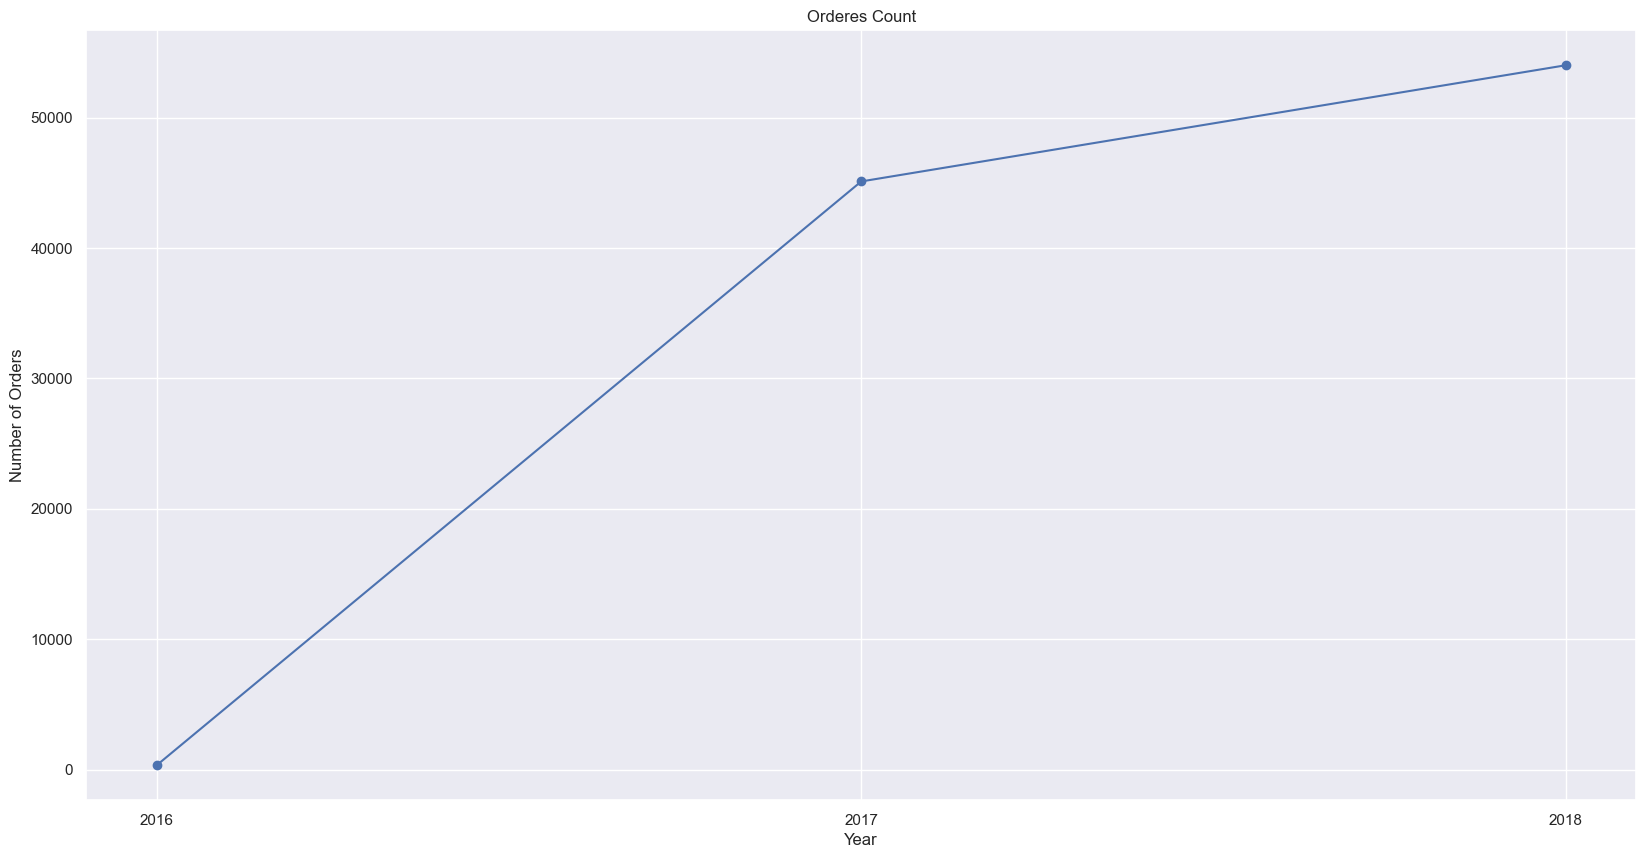

In [77]:
# Plot Number Of Orders Per Yeay
orders_per_year=orders_per_year.plot(figsize=(20, 10),marker='o', linestyle='-', color='b')
plt.title('Orderes Count')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks([2016, 2017, 2018], ['2016', '2017', '2018'])
plt.show()

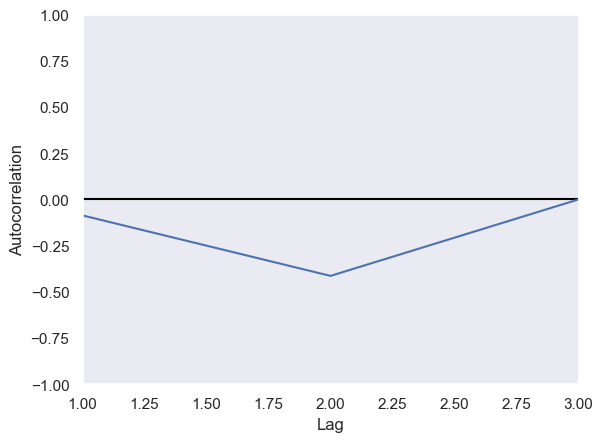

In [80]:

# Plot autocorrelation to check for seasonality or trends
autocorrelation_plot(orders_per_year)
plt.show()

In [81]:
# Define the ARIMA model, starting with p=1, d=1, q=1 as a basic model
model = ARIMA(orders_per_year, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())
forecast

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-pa

                               SARIMAX Results                                
Dep. Variable:               order_id   No. Observations:                    3
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -23.547
Date:                Tue, 22 Oct 2024   AIC                             53.094
Time:                        23:48:46   BIC                             49.174
Sample:                             0   HQIC                            44.895
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5732   6.01e+04  -9.53e-06      1.000   -1.18e+05    1.18e+05
ma.L1          1.0000   2.57e+04   3.89e-05      1.000   -5.03e+04    5.03e+04
sigma2      8.256e+08   3.11e-05   2.65e+13      0.0

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3160: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3160: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


NameError: name 'forecast' is not defined

In [82]:
orders_per_year = pd.DataFrame(orders_per_year)
orders_per_year


,order_id
year,
2016,329
2017,45101
2018,54011


In [83]:
# Fit ARIMA model
model = ARIMA(orders_per_year, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-pa

In [84]:
# Forecast for the next 5 years
forecast = model_fit.forecast(steps=5)

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [85]:
forecast.shape

(5,)

In [220]:
# # Define the ARIMA model, starting with p=1, d=1, q=1 as a basic model
# model = ARIMA(orders_per_year, order=(1, 1, 1))

# # Fit the model
# model_fit = model.fit()

# # Summary of the model
# print(model_fit.summary())


# # Fit ARIMA model
# model = ARIMA(orders_per_year, order=(1, 1, 1))
# model_fit = model.fit()

# # Forecast for the next 5 years
# forecast = model_fit.forecast(steps=5)

# forecast

3    46977.609864
4    51009.217070
5    48698.260852
6    50022.923293
7    49263.613978
Name: predicted_mean, dtype: float64

In [258]:
# # Ensure orders_per_year.index is an Int64Index, not a DateTimeIndex or something else
last_year = orders_per_year.index.max()  # Get the last year from the index
last_year

np.int32(2018)

In [259]:

forecast_years.index = range(last_year + 1, last_year + 6)

,predicted_mean
3,46977.609864
4,51009.217070
5,48698.260852
6,50022.923293
7,49263.613978


In [260]:
# Setup a forecast as DataFrame For Coming five Years
forecast_years.index = range(last_year + 1, last_year + 6)
forecast_years.rename(columns={'predicted_mean':'forecast'}, inplace=True)
forecast_years = pd.DataFrame(forecast_years)
forecast_years

,forecast
3,46977.609864
4,51009.217070
5,48698.260852
6,50022.923293
7,49263.613978


In [131]:
forecast_years = pd.DataFrame(forecast_years)
forecast_years

,forecast
3,46977.609864
4,51009.217070
5,48698.260852
6,50022.923293
7,49263.613978


In [261]:
forecast_years.index = range(last_year + 1, last_year + 6)

In [ ]:
# forecast_years.index = 	forecast_years['forecast'].range(last_year + 1, last_year + 6) # Set the next 5 years as index

In [143]:
# # Check if the length matches (forecast_years should have 5 rows)
forecast_years

,forecast
2019,46977.609864
2020,51009.217070
2021,48698.260852
2022,50022.923293
2023,49263.613978


In [ ]:
# Sure! Here's an explanation of the ARIMA model results shown in the graph:

# - **Actual Data (2016-2019)**: The blue line represents the actual order counts, which increased sharply from around 10,000 in 2016 to approximately 50,000 in 2019.
# - **Forecast Data (2019-2023)**: The red line represents the forecasted order counts from 2019 to 2023. 
# The forecast remains relatively stable around the 50,000 mark with slight fluctuations.
# - **Trend Analysis**: The model predicts that the order count will stabilize at around 50,000 over the next few years, indicating a period of steady demand.
# - **Business Implication**: This stability suggests that the business can expect consistent order volumes, allowing for better planning and resource allocation.

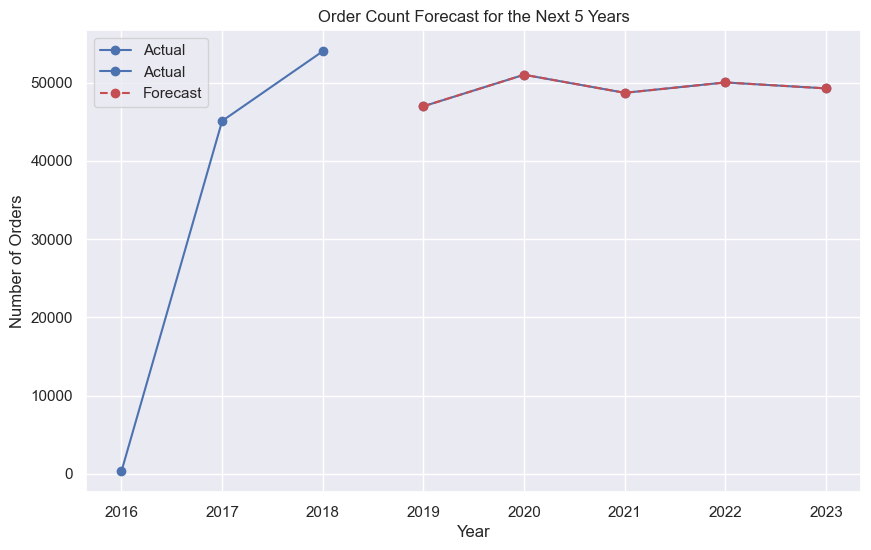

In [262]:
# Combine actual data and forecasted data for plotting
combined_data = pd.concat([orders_per_year, forecast_years])

# Plot the forecast along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(combined_data, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(forecast_years, marker='o', linestyle='--', color='r', label='Forecast')
plt.title('Order Count Forecast for the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Extract the Month from 'order_purchase_timestamp'
orders['Month'] = orders['order_purchase_timestamp'].dt.month
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


In [237]:
orders['Month'] = orders['Month'].astype(int)

In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   Month                          99441 non-null  int32         
dtypes: datetime64[ns](5), int32(1), object(3)
memory usage: 6.4+ MB


In [27]:
orders_per_Month = orders.groupby('Month')['order_id'].nunique()#.reset_index()
orders_per_Month 

Month
1      8069
2      8508
3      9893
4      9343
5     10573
6      9412
7     10318
8     10843
9      4305
10     4959
11     7544
12     5674
Name: order_id, dtype: int64

In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   Month                          99441 non-null  int32         
dtypes: datetime64[ns](5), int32(1), object(3)
memory usage: 6.4+ MB


In [29]:
orders['Month'] = pd.to_datetime(orders['Month'],errors = 'coerce')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   Month                          99441 non-null  datetime64[ns]
dtypes: datetime64[ns](6), object(3)
memory usage: 6.8+ MB


In [30]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   Month                          99441 non-null  datetime64[ns]
dtypes: datetime64[ns](6), object(3)
memory usage: 6.8+ MB


In [32]:
orders.set_index('Month',inplace=True)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
Month,,,,,,,,
1970-01-01 00:00:00.000000010,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1970-01-01 00:00:00.000000007,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
1970-01-01 00:00:00.000000008,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
1970-01-01 00:00:00.000000011,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
1970-01-01 00:00:00.000000002,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000003,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
1970-01-01 00:00:00.000000002,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
1970-01-01 00:00:00.000000008,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27


In [86]:
orders['Month'] = orders['order_purchase_timestamp'].dt.month
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month
year,,,,,,,,,
2017,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10
2018,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7
2018,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8
2017,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11
2018,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


In [58]:
# orders['Month'] = pd.to_datetime(orders['Month'],errors = 'coerce')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   Month                          99441 non-null  int32         
dtypes: datetime64[ns](5), int32(1), object(3)
memory usage: 6.4+ MB


In [56]:
orders['Month'] = orders['order_purchase_timestamp'].dt.month
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1970-01-01 00:00:00.000000010
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1970-01-01 00:00:00.000000007
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1970-01-01 00:00:00.000000008
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1970-01-01 00:00:00.000000011
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1970-01-01 00:00:00.000000002


In [87]:
orders['Month'] = orders['Month'].astype(int)

In [88]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month
year,,,,,,,,,
2017,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10
2018,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7
2018,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8
2017,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11
2018,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


In [89]:
orders.set_index('Month',inplace=True)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
Month,,,,,,,,
10,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
7,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
11,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
3,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
2,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
8,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27


In [90]:
orders_per_Month = orders.groupby('Month')['order_id'].nunique()#.reset_index()
orders_per_Month 

Month
1      8069
2      8508
3      9893
4      9343
5     10573
6      9412
7     10318
8     10843
9      4305
10     4959
11     7544
12     5674
Name: order_id, dtype: int64

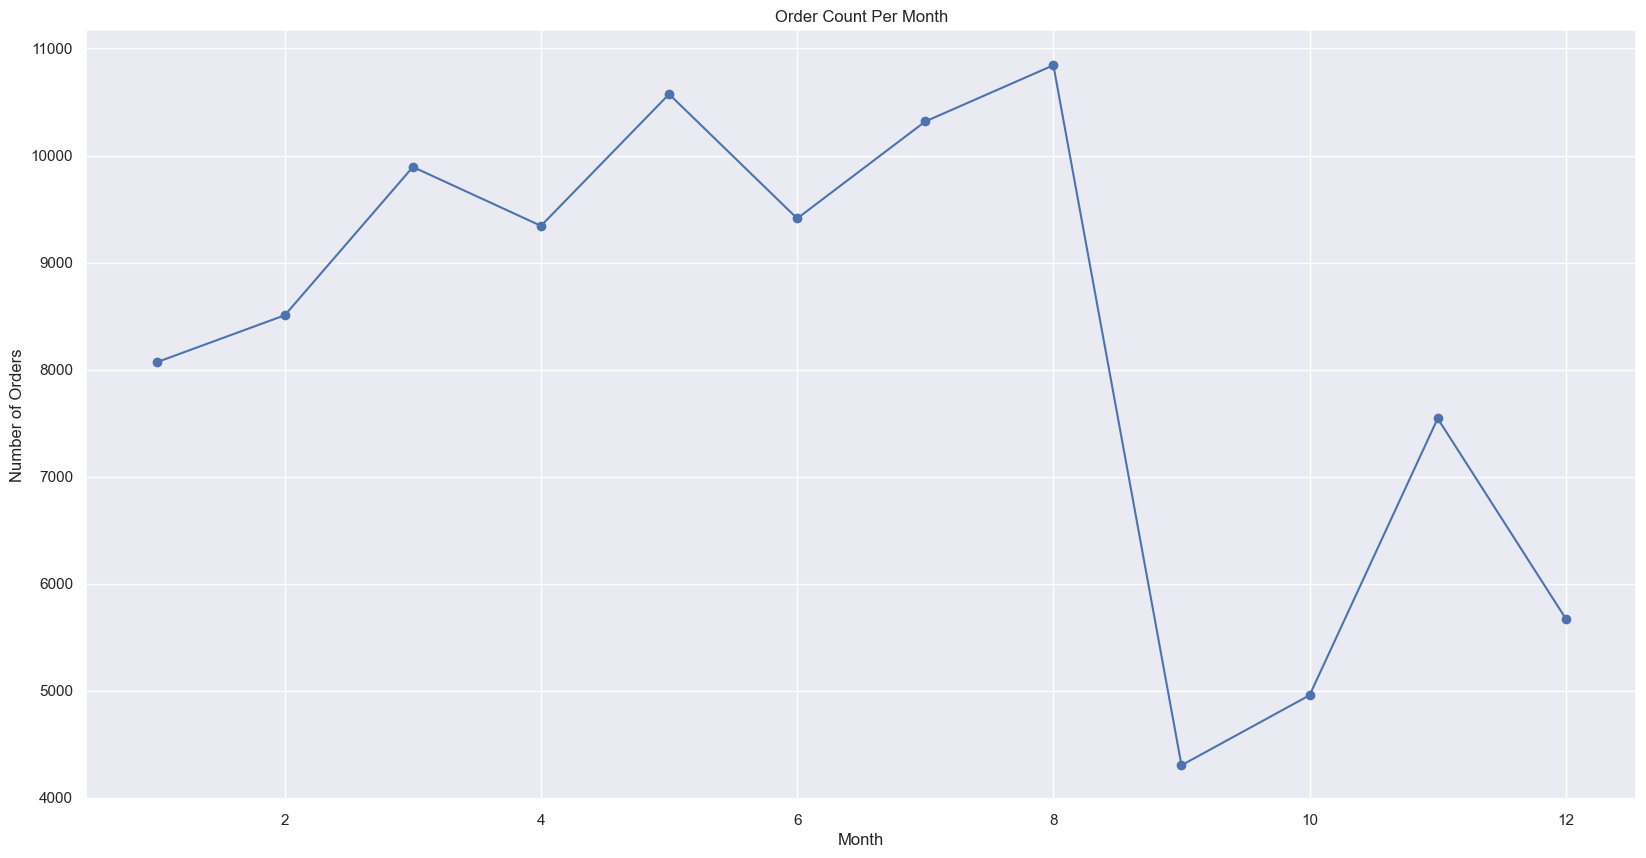

In [62]:
#Number Of Orders Per Month
orders_per_Month_plot = orders_per_Month.plot(figsize=(20, 10),marker='o', linestyle='-', color='b')
plt.title('Order Count Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks([2, 4, 8, 8, 10,12], ['FEB', 'APR', '4M', '6M', '8M'])
# plt.legend()
plt.grid(True)
plt.show()

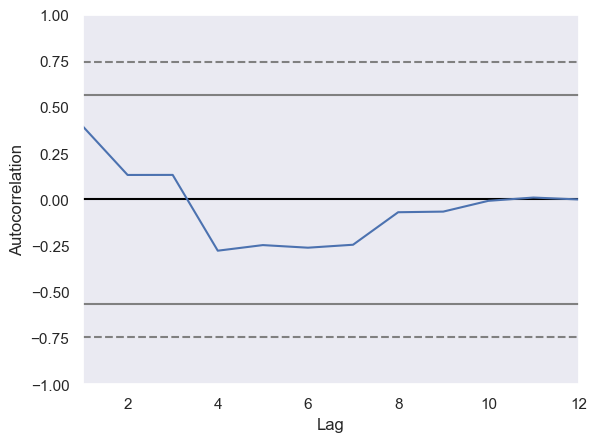

In [63]:
# Plot autocorrelation to check for seasonality or trends
autocorrelation_plot(orders_per_Month)
plt.show()


In [64]:
# Define the ARIMA model, starting with p=1, d=1, q=1 as a basic model
model = ARIMA(orders_per_Month, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               order_id   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -100.546
Date:                Tue, 22 Oct 2024   AIC                            207.091
Time:                        06:50:46   BIC                            208.285
Sample:                             0   HQIC                           206.339
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7834      0.469      1.671      0.095      -0.136       1.702
ma.L1         -0.9986      0.597     -1.673      0.094      -2.168       0.171
sigma2      4.682e+06   1.28e-07   3.66e+13      0.0

In [65]:
orders_per_Month = pd.DataFrame(orders_per_Month)
orders_per_Month

,order_id
Month,
1,8069
2,8508
3,9893
4,9343
5,10573
6,9412
7,10318
8,10843
9,4305


In [67]:
# Fit ARIMA model
model = ARIMA(orders_per_Month, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [69]:
# Forecast for the next 5 years
forecast = model_fit.forecast(steps=5)

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(5,)

In [70]:
forecast.shape

(5,)

In [71]:
# # Ensure orders_per_Month.index is an Int64Index, not a DateTimeIndex or something else
last_Month = orders_per_Month.index.max()  # Get the last Month from the index
last_Month


# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               order_id   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -100.546
Date:                Tue, 22 Oct 2024   AIC                            207.091
Time:                        06:56:08   BIC                            208.285
Sample:                             0   HQIC                           206.339
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7834      0.469      1.671      0.095      -0.136       1.702
ma.L1         -0.9986      0.597     -1.673      0.094      -2.168       0.171
sigma2      4.682e+06   1.28e-07   3.66e+13      0.0

In [74]:
# # Assign proper index to forecast (next 5 years)
forecast_Month = pd.DataFrame(forecast)
forecast_Month

,predicted_mean
12,5796.028333
13,5891.625318
14,5966.515988
15,6025.185333
16,6071.146893


In [79]:
forecast_Month.rename(columns={'predicted_mean':'forecast'}, inplace=True)
forecast_Month

,forecast
12,5796.028333
13,5891.625318
14,5966.515988
15,6025.185333
16,6071.146893


In [80]:
forecast_Month.index = range(last_year + 1, last_year + 6)

In [81]:
forecast_Month

,forecast
13,5796.028333
14,5891.625318
15,5966.515988
16,6025.185333
17,6071.146893


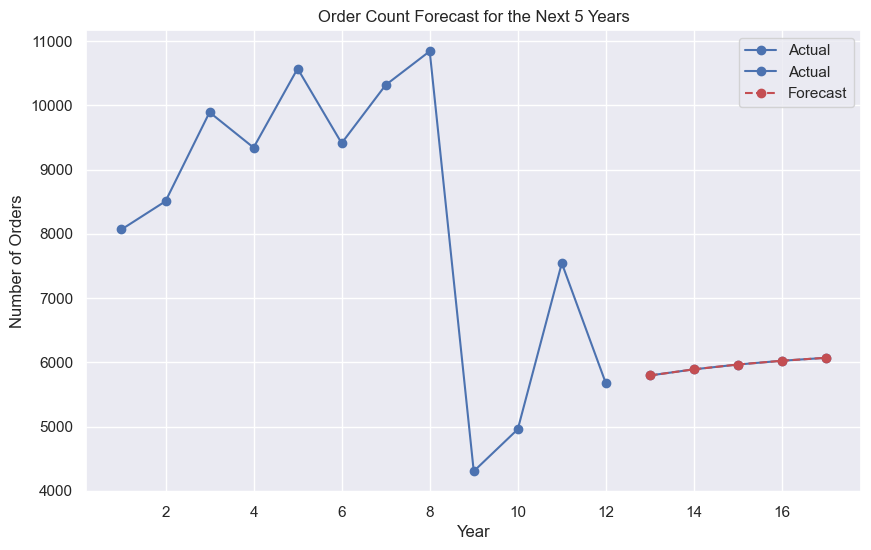

In [82]:
combined_data = pd.concat([orders_per_Month, forecast_Month])

# Plot the forecast along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(combined_data, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(forecast_Month, marker='o', linestyle='--', color='r', label='Forecast')
plt.title('Order Count Forecast for the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
Orderds_no_duplicates = orders.drop_duplicates()
Orderds_no_duplicates

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018


In [122]:
# payments, orders
Payment_per_year = pd.concat([orders, payments],axis=1,join='inner')
Payment_per_year

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,43b9e48ec7fc386f9083ac3153363103,1,credit_card,2,43.70
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018,ee9881886ccdd7fb25bf631d38c0fc35,1,boleto,1,31.43
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017,20914c76989e5eac4e2675de44f7275a,1,boleto,1,57.97
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018,0ac37dcbb2a733a4d81866a91ff65965,1,credit_card,3,71.35


In [123]:
payment_per_year = Payment_per_year.groupby('year')['payment_value'].sum()#.reset_index()
payment_per_year 

year
2016      53726.96
2017    6947529.12
2018    8341058.96
Name: payment_value, dtype: float64

In [127]:
# Extract the year from 'order_purchase_timestamp'
# orders['year'] = orders['order_purchase_timestamp'].dt.year
payment_per_year = pd.DataFrame(payment_per_year)
payment_per_year

,payment_value
year,
2016,53726.96
2017,6947529.12
2018,8341058.96


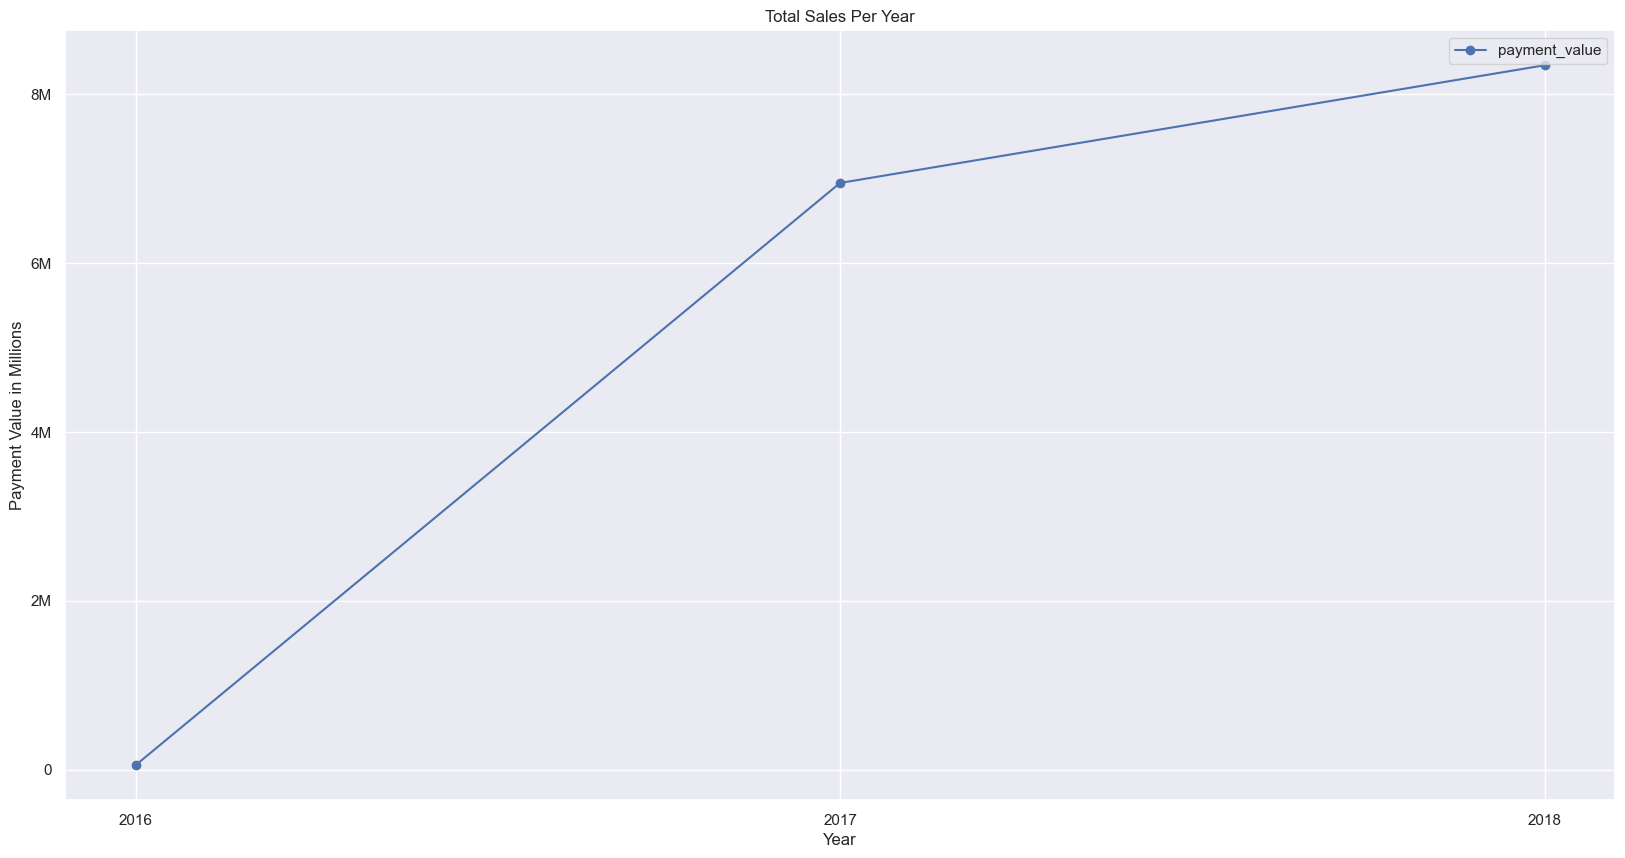

In [133]:
#Total Sales Per Year
payment_per_year_plot = payment_per_year.plot(figsize=(20, 10),marker='o', linestyle='-', color='b')
plt.title('Total Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Payment Value in Millions')
# Customize ,x&y-axis ticks

plt.yticks([0, 2e6, 4e6, 6e6, 8e6], ['0', '2M', '4M', '6M', '8M'])
plt.legend()
plt.grid(True)
plt.show()

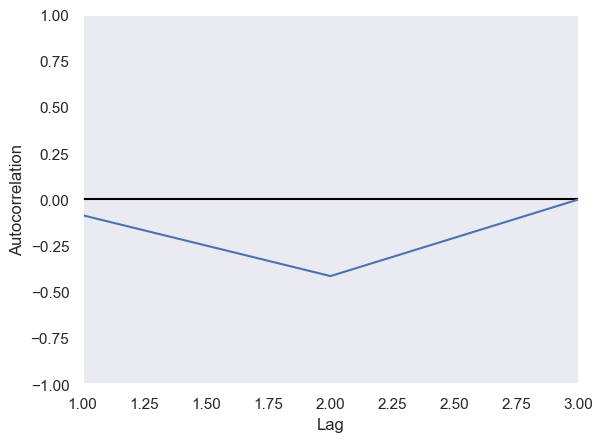

In [136]:
# Plot autocorrelation to check for seasonality or trends
autocorrelation_plot(payment_per_year)
plt.show()

In [138]:
# Define the ARIMA model, starting with p=1, d=1, q=1 as a basic model
model = ARIMA(payment_per_year, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-pa

                               SARIMAX Results                                
Dep. Variable:          payment_value   No. Observations:                    3
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -35.029
Date:                Tue, 22 Oct 2024   AIC                             76.058
Time:                        08:13:28   BIC                             72.137
Sample:                             0   HQIC                            67.858
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3474      0.969     -0.359      0.720      -2.246       1.552
ma.L1          0.9998      0.526      1.902      0.057      -0.031       2.030
sigma2      5.042e+12   1.04e-13   4.83e+25      0.0

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3160: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3160: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


In [139]:
payment_per_year = pd.DataFrame(payment_per_year)
payment_per_year

,payment_value
year,
2016,53726.96
2017,6947529.12
2018,8341058.96


In [140]:
# Fit ARIMA model
model = ARIMA(payment_per_year, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-pa

In [141]:
# Forecast for the next 5 years
forecast = model_fit.forecast(steps=5)

C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asd\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [144]:
# # Ensure orders_per_year.index is an Int64Index, not a DateTimeIndex or something else
last_year = payment_per_year.index.max()  # Get the last year from the index
last_year

np.int32(2018)

In [143]:
# Assign proper index to forecast (next 5 years)
forecast_years = pd.DataFrame(forecast)
forecast_years

,predicted_mean
3,6.736392e+06
4,7.293785e+06
5,7.100170e+06
6,7.167423e+06
7,7.144063e+06


In [145]:
forecast_years.rename(columns={'predicted_mean':'forecast'}, inplace=True)
forecast_years

,forecast
3,6.736392e+06
4,7.293785e+06
5,7.100170e+06
6,7.167423e+06
7,7.144063e+06


In [146]:
forecast_years.index = range(last_year + 1, last_year + 6)

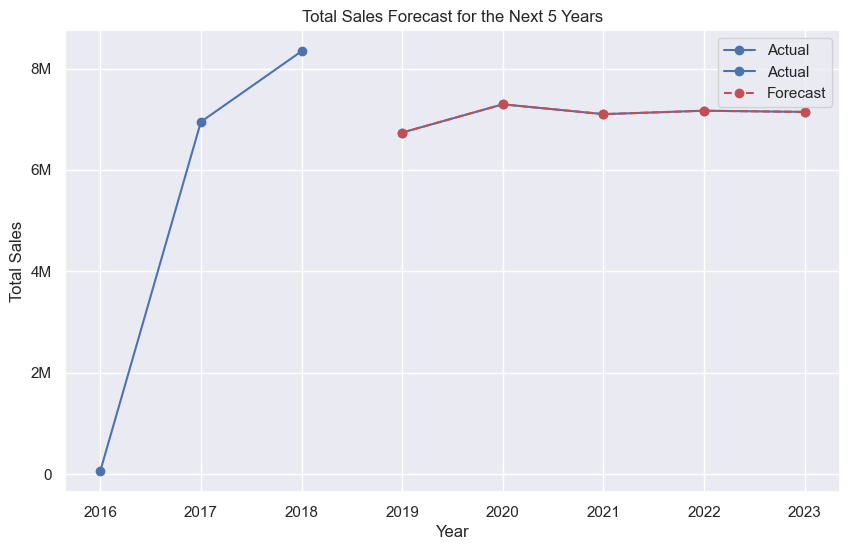

In [149]:
# Combine actual data and forecasted data for plotting
combined_data = pd.concat([payment_per_year, forecast_years])

# Plot the forecast along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(combined_data, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(forecast_years, marker='o', linestyle='--', color='r', label='Forecast')
plt.title('Total Sales Forecast for the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.yticks([0, 2e6, 4e6, 6e6, 8e6], ['0', '2M', '4M', '6M', '8M'])
plt.legend()
plt.grid(True)
plt.show()